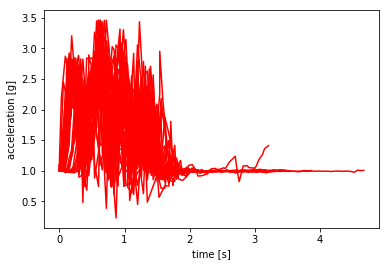

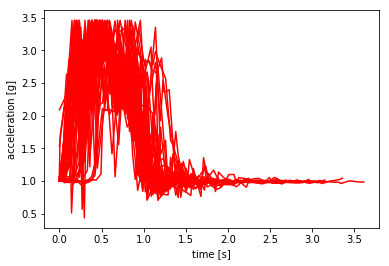

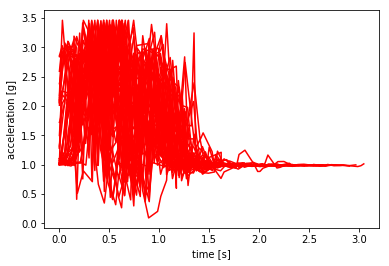

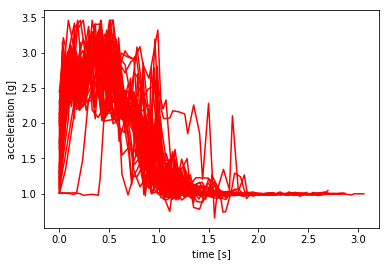

In [2]:
import os
import csv
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas

kicktype = ["TurningKick", "AxeKick", "CutKick", "CrescentKick"]
export_list = []
#-----------Turning Kick------------------------------------

for type in kicktype:
    path = "csv/Right_" + type + "_CSV/"
    for x in range(50):
        allFiles = (path+type+str(x+1)+"_Accelerometer.csv")
        allGyroscopeFiles = (path+type+str(x+1)+"_Gyroscope.csv")

        df = pandas.read_csv(allFiles, skiprows=4)
        df.dropna(subset = ["Date"], inplace=True)
        acc = df['X (mg)']**2 + df['Y (mg)']**2 + df['Z (mg)']**2
        acc = np.sqrt(acc)

        for i, j in enumerate(acc[:-1]):
            if (j < acc[i+1])and(j>1000): 
                start = i
                break

        end = max(idx for idx, val in enumerate(acc)  
                                          if val > 1000)

        acc=acc.iloc[start:end]
        HostTime = df['HostTimestamp']
        HostTime=HostTime.iloc[start:end]
        HostTime = HostTime.astype('int64')
        HostTime -= HostTime[start]
        HostTime /= 1000

        df2 = pandas.read_csv(allGyroscopeFiles, skiprows=4)
        df2.dropna(subset = ["Date"], inplace=True)
        df2=df2.iloc[start:end]

        export_list.append([acc.mean(), acc.std(), acc.min(), acc.max(), kicktype.index(type)+1, df2['X (dps)'].mean(), df2['X (dps)'].std(), df2['X (dps)'].min(), df2['X (dps)'].max()
                           , df2['Y (dps)'].mean(), df2['Y (dps)'].std(), df2['Y (dps)'].min(), df2['Y (dps)'].max()
                           , df2['Z (dps)'].mean(), df2['Z (dps)'].std(), df2['Z (dps)'].min(), df2['Z (dps)'].max()])

        acc=np.array(acc)/1000
        HostTime = np.array(HostTime)

        plt.plot(HostTime,acc,'r-')
        plt.xlabel('time [s]')
        plt.ylabel('acceleration [g]')
    plt.show()


with open('Accelerometer.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["mean", "std", "min", "max", "kick_Type", "GyrX_mean", "GyrX_std", "GyrX_min", "GyrX_max"
                    , "GyrY_mean", "GyrY_std", "GyrY_min", "GyrY_max"
                    , "GyrZ_mean", "GyrZ_std", "GyrZ_min", "GyrZ_max"])
    for row in export_list:
        writer.writerow(row)
    
    
    

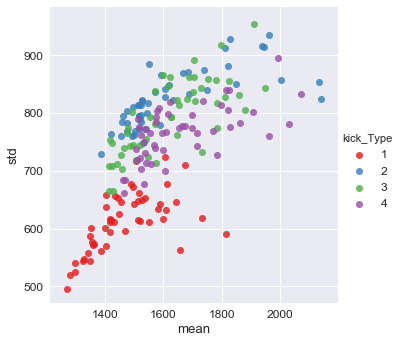

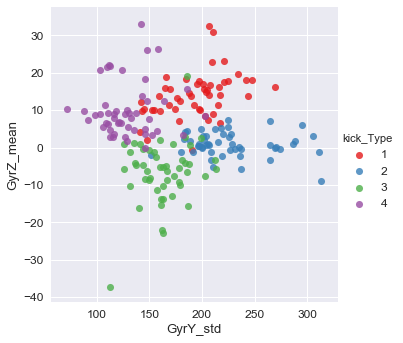

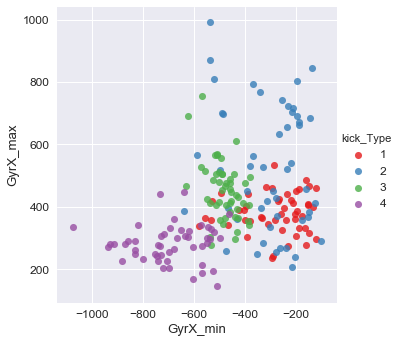

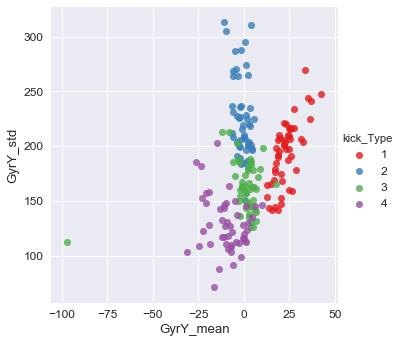

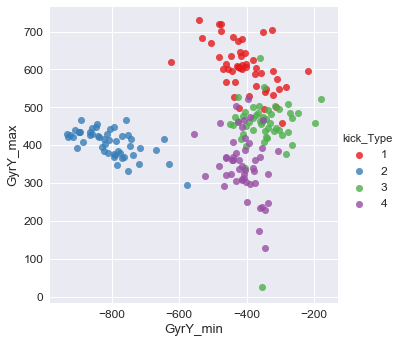

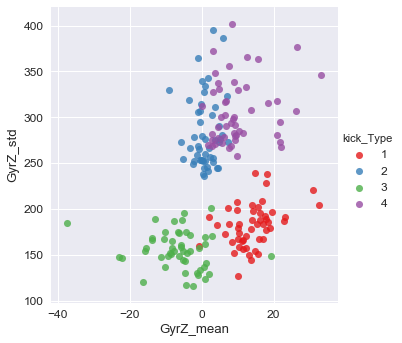

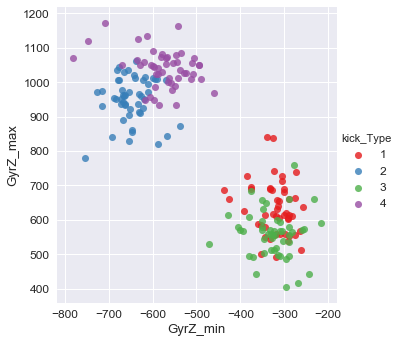

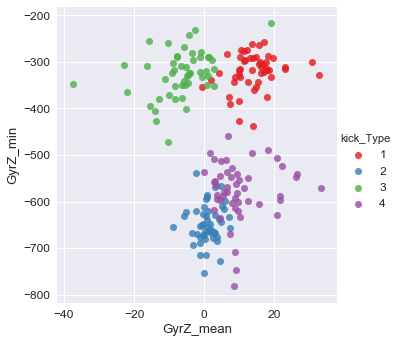

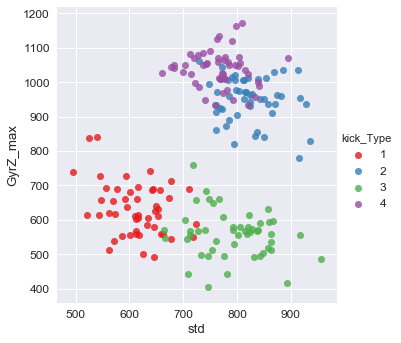

In [40]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

data = pd.read_csv('Accelerometer.csv')

sns.lmplot('mean', 'std',
           data=data,
           hue='kick_Type',
           #col='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('GyrY_std', 'GyrZ_mean',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('GyrX_min', 'GyrX_max',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('GyrY_mean', 'GyrY_std',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('GyrY_min', 'GyrY_max',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('GyrZ_mean', 'GyrZ_std',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('GyrZ_min', 'GyrZ_max',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('GyrZ_mean', 'GyrZ_min',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('std', 'GyrZ_max',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

In [41]:
from sklearn import svm
#---Converting the Columns as Matrices---
points = data[['mean','std']].values
result = data['kick_Type']

clf = svm.SVC(kernel = 'linear')
clf.fit(points, result)

print('Vector of weights (w) = ',clf.coef_[0])
print('b = ',clf.intercept_[0])
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ',
       np.abs(clf.dual_coef_))

Vector of weights (w) =  [ 0.00952143 -0.07553357]
b =  40.896980078690916
Indices of support vectors =  [  3   7  24  27  32  34  36  49  50  51  54  55  56  60  61  64  65  66
  67  68  69  71  72  73  74  75  77  78  79  80  81  82  84  85  86  87
  88  89  91  92  93  94  96  97  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 156 157 158 159 160 161 162 163
 164 165 167 168 169 170 171 172 173 174 178 179 180 182 183 184 185 187
 189 190 191 192 193 195 196 197 199]
Support vectors =  [[1495.10228504  672.63604524]
 [1403.57180083  658.57597929]
 [1504.55454638  717.86909632]
 [1487.93922796  677.98049856]
 [1604.85091687  723.84635493]
 [1673.96069204  709.889739  ]
 [1517.36386823  662.13504416]
 [1611.82975131  677.16357   ]
 [1688.0076      833.91637824]
 [1538.6587556   771.91417598]
 [1501.8557525   

In [47]:
X = data[['GyrZ_mean','GyrZ_min']].values
y = np.where(data['kick_Type']=='1', '2', '3', '4') #--1 for Y and 0 for N---
model = svm.SVC(kernel='linear').fit(X, y)

sns.lmplot('GyrZ_mean', 'GyrZ_min',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
h = (x_max / x_min) / 20

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Size of house')
plt.ylabel('Asking price (1000s)')
plt.title("Size of Houses and Their Asking Prices")

C:\Users\John\Anaconda3\lib\site-packages\pandas\core\ops.py:1164: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison